# Оглавление
[1. Загрузка и подготовка данных](#glava_1)  
[2. Обучение и проверка модели](#glava_2)  
[3. Подготовка к расчёту прибыли](#glava_3)  
[4. Расчёт прибыли и рисков](#glava_4)  
[Вывод](#conclusion)  

<a id="glava_1"></a>
# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.dummy import DummyClassifier
import warnings
from IPython.display import display
warnings.filterwarnings("ignore", category=FutureWarning)

Загрузим данные

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
df_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [4]:
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

Изучим структуру и типы данных:

In [5]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Проверим данные на наличие пропусков и дубликатов:

In [9]:
df_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
df_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
df_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
df_0.duplicated().sum()

0

In [13]:
df_1.duplicated().sum()

0

In [14]:
df_2.duplicated().sum()

0

In [15]:
# извлечем признаки 
# извлечем целевой признак

Удалим лишние столбы, которые могут повлиять на обучение модели:

In [16]:
df_0 = df_0.drop(['id'], axis=1)
df_1 = df_1.drop(['id'], axis=1)
df_2= df_2.drop(['id'], axis=1)

Создадим функцию `feature_extraction` для извлечения целевого признака и проведем разделение данных на трех площадках:

In [17]:
# извлечение целевого признака
def feature_extraction (df, name_table):
    features = df.drop(name_table, axis=1)
    target = df[name_table]
    return features, target

In [18]:
features_0, target_0 = feature_extraction(df_0, ['product'])

In [19]:
features_1, target_1 = feature_extraction(df_1, ['product'])

In [20]:
features_2, target_2 = feature_extraction(df_2, ['product'])

Изучим целевую переменную `product`:

In [21]:
target_0.describe()

,product
count,100000.000000
mean,92.500000
std,44.288691
min,0.000000
25%,56.497507
50%,91.849972
75%,128.564089
max,185.364347


In [22]:
target_1.describe()

,product
count,100000.000000
mean,68.825000
std,45.944423
min,0.000000
25%,26.953261
50%,57.085625
75%,107.813044
max,137.945408


In [23]:
target_2.describe()

,product
count,100000.000000
mean,95.000000
std,44.749921
min,0.000000
25%,59.450441
50%,94.925613
75%,130.595027
max,190.029838


### Вывод

Для анализа предоставленны данные для трех регионов:
- **Регион_0**,
- **Регион_1**, 
- **Регион_2**.  

Размеры таблиц с данными 100000 строк и 5 столбцов. Данные имеют единый формат без аномалий в значениях.  

Пропуски и дубликаты отсутствуют.  

Целевой признак столбец - `product`.  

<a id="glava_2"></a>
# 2. Обучение и проверка модели

Разделим данные по регионам на обучающую и валидационную выборку. Размер валидационной выборки составляет 25% от общего количества данных.

In [24]:
# отделим 25% данных для валидационной выборки
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

In [25]:
# отделим 25% данных для валидационной выборки
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

In [26]:
# отделим 25% данных для валидационной выборки
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

Создадим функцию `output_model` для вывода предсказанных значений по валидационной выборке `data_pred`, среднего значения `mean`, среднеквадратичной ошибки `rmse`.

In [27]:
def output_model(model, features_valid, target_valid):
    warnings.filterwarnings("ignore")
    predicted_valid = model.predict(features_valid)
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = mse ** 0.5
    mean = predicted_valid.mean()
    target_valid['predict'] = predicted_valid
    data_pred = target_valid
    return data_pred, mean, rmse

Так как значений целевого признака явяется непрерывной переменной, для обучения подойдет модель - ***линейная регрессия (Linear Regression).***  
Обучим три модели для каждого региона:

In [28]:
model_0 = LinearRegression(normalize=True)
model_0.fit(features_train_0, target_train_0);

In [29]:
model_1 = LinearRegression(normalize=True)
model_1.fit(features_train_1, target_train_1);

In [30]:
model_2 = LinearRegression(normalize=True)
model_2.fit(features_train_2, target_train_2);

Выполним функцию `output_model` для каждого региона, построим графики *Boxplot* и проведем анализ результатов:

In [31]:
data_pred_0, mean_0, rmse_0 = output_model(model_0, features_valid_0, target_valid_0)

In [32]:
data_pred_0.head()

,product,predict
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088


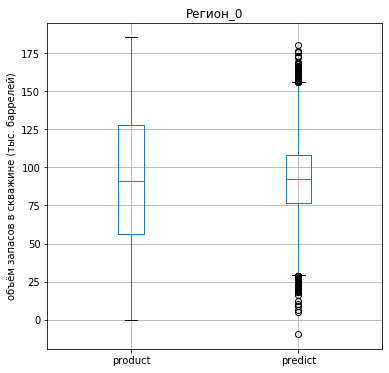

In [33]:
data_pred_0.boxplot(figsize=(6, 6));
plt.title('Регион_0')
plt.ylabel('объём запасов в скважине (тыс. баррелей)')
plt.show()

In [34]:
data_pred_1, mean_1, rmse_1 = output_model(model_1, features_valid_1, target_valid_1)

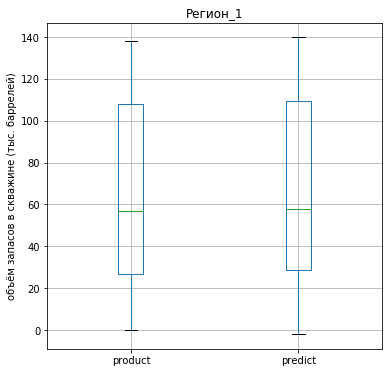

In [35]:
data_pred_1.boxplot(figsize=(6, 6));
plt.title('Регион_1')
plt.ylabel('объём запасов в скважине (тыс. баррелей)')
plt.show()

In [36]:
data_pred_2, mean_2, rmse_2 = output_model(model_2, features_valid_2, target_valid_2)

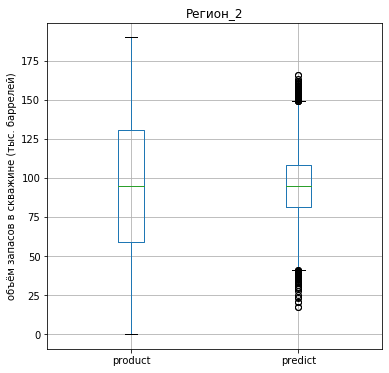

In [37]:
data_pred_2.boxplot(figsize=(6, 6));
plt.title('Регион_2')
plt.ylabel('объём запасов в скважине (тыс. баррелей)')
plt.show()

In [38]:
target_valid_0['product'].mean()

92.07859674082927

In [39]:
#соберем в таблицу данные mean, rmse
result_model = {'Region':('Регион_0', 'Регион_1', 'Регион_2'),
                'MEAN_product':(target_valid_0['product'].mean(), target_valid_1['product'].mean(), target_valid_2['product'].mean()),
                'MEAN_predict':(mean_0, mean_1, mean_2), 
                'RMSE':(rmse_0, rmse_1, rmse_2)
                }
result_model = pd.DataFrame(result_model)
result_model

,Region,MEAN_product,MEAN_predict,RMSE
0,Регион_0,92.078597,92.592568,37.579422
1,Регион_1,68.723136,68.728547,0.893099
2,Регион_2,94.884233,94.965046,40.029709


****Средние значения*** по предсказанным значениям валидационной выборки и изначальным значениям практически ***не отличаются***.  

Значения ***RMSE*** очень велики у моделей Регион_0 и Регион_2, для Региона_1 модель показала наилучший результат.  

Графики **boxplot** наглядно показывают сделанные ранее выводы. На первом и третьем графике очень много выбросов, а основная часть данных предсказываются как незначительное отклонение от медианы.


### Вывод

Данные были разделены на обучающие и валидационные выборки для каждого региона.  

В качестве обучающей модели выбрана - **линейная регрессия**, т.к. значения целевого признака явяются непрерывной переменной. 

***Средние значения*** для предсказанных и изначальных значений практически ***не отличаются***.  

Лучшее значение **RMSE** показала модель обученная на данных Регоина_1.


<a id="glava_3"></a>
# 3. Подготовка к расчёту прибыли

Сохраним все ключевые значения для расчётов в отдельных переменных:

In [40]:
# Стоимость барреля
COST_BARREL = 450

In [41]:
# бюджет на разработку в регионе
BUDGET = 10000000000

In [42]:
#количество скважин для разработки
WELL_COUNT = 200

Рассчитаем безубыточное количество нефти в скважине в тыс. баррелей:

In [43]:
#безубыточное количество в скважине
well_breakeven = BUDGET / WELL_COUNT / COST_BARREL / 1000
well_breakeven

111.11111111111111

Сравним безубыточное количество сырья в скважине со средним значением в регионах **(compare_mean)** и внесем эти данные в таблицу *result_model*:

In [44]:
result_model['compare_mean'] = well_breakeven - result_model['MEAN_predict']

In [45]:
result_model

,Region,MEAN_product,MEAN_predict,RMSE,compare_mean
0,Регион_0,92.078597,92.592568,37.579422,18.518543
1,Регион_1,68.723136,68.728547,0.893099,42.382564
2,Регион_2,94.884233,94.965046,40.029709,16.146065


Как мы видим, в Регионе_0 и Регионе_2 в среднем запасы сырья выше, а соответственно шанс получить серьезную прибыль в этих регионах возрастает.  

Создадим функцию `profit_region` для расчёта прибыли по выбранным скважинам и предсказаниям модели в млрд. руб:

In [46]:
def profit_region(data, column_product, count):
    data = data.sort_values(by=column_product, ascending=False)
    data = data[:count]
    sum_reserve = data['product'].sum()
    profit = sum_reserve * COST_BARREL * 1000 - BUDGET
    return profit/1000000000

Рассчитаем максимальнуя прибыль по предсказанным значениям для каждого региона:

In [47]:
profit_reg0 = profit_region(data_pred_0, 'predict', 200)
profit_reg0

3.3208260431398524

In [48]:
profit_reg1 = profit_region(data_pred_1, 'predict', 200)
profit_reg1

2.415086696681513

In [49]:
profit_reg2 = profit_region(data_pred_2, 'predict', 200)
profit_reg2

2.7103499635998327

In [50]:
#максимальцные прибыли в регионах
profit_max_pred = {'Region':('Регион_0', 'Регион_1', 'Регион_2'),
                'profit_max':(profit_reg0, profit_reg1, profit_reg2),
                }
profit_max_pred = pd.DataFrame(profit_max_pred)
profit_max_pred

,Region,profit_max
0,Регион_0,3.320826
1,Регион_1,2.415087
2,Регион_2,2.710350


### Вывод

Для подготовки расчета прибыли использовались следующие данные:
- стоимость барреля - 450 руб;
- бюджет на разработку в регионе - 10 млрд. руб;
- количество скважин для разработки в одном регионе - 200 ед
- стоимость разработки одной скважины 50 млн. руб.  

Безубыточное количество сырья в скважине - 111 тыс. баррелей.  

В связи с тем, что средние значения по всем скважинам в регионе ниже безубыточного количества, необходимо тщательно выбирать места для разработки скважин.  

Максимально возможные прибыли в регионах для предсказанных значений:
- Регион_0 - 3.32 млрд. руб;
- Регион_1 - 2.41 млрд. руб;
- Регион_2 - 2.71 млрд. руб.

<a id="glava_4"></a>
# 4. Расчёт прибыли и рисков 

Посчитаем риски и прибыль для каждого региона.   

In [51]:
state = np.random.RandomState(1)

In [52]:
risk_loss = 0

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.  

Найдем среднюю прибыль и 95%-й доверительный интервал.

**Расчет Регион_0:**

In [53]:
values_reg0 = []
for i in range(1000):
    subsample_0 = data_pred_0.sample(n=500, replace=True, random_state=state)
    values_reg0.append(profit_region(subsample_0, 'predict', 200))    

values_reg0 = pd.Series(values_reg0)
lower_0 = values_reg0.quantile(0.025)
upper_0 = values_reg0.quantile(0.975)

In [54]:
profit_distr_mean_0 = values_reg0.mean()

In [55]:
confidence_interval_0 = (lower_0.round(4), upper_0.round(4))
confidence_interval_0

(-0.1077, 0.9142)

**Расчет Регион_1:**

In [56]:
values_reg1 = []
for i in range(1000):
    subsample_1 = data_pred_1.sample(n=500, replace=True, random_state=state)
    values_reg1.append(profit_region(subsample_1, 'predict', 200))    

values_reg1 = pd.Series(values_reg1)
lower_1 = values_reg1.quantile(0.025)
upper_1 = values_reg1.quantile(0.975)

print(lower_1)
print(upper_1)

0.07522693832674518
0.8551319862409757


In [57]:
profit_distr_mean_1 =values_reg1.mean()

In [58]:
confidence_interval_1 = (lower_1.round(4), upper_1.round(4))
confidence_interval_1

(0.0752, 0.8551)

**Расчет Регион_2:**

In [59]:
values_reg2 = []
for i in range(1000):
    subsample_2 = data_pred_2.sample(n=500, replace=True, random_state=state)
    values_reg2.append(profit_region(subsample_2, 'predict', 200))    


values_reg2 = pd.Series(values_reg2)
lower_2 = values_reg2.quantile(0.025)
upper_2 = values_reg2.quantile(0.975)

print(lower_2)
print(upper_2)

-0.11212651261968093
0.9127454399463042


In [60]:
profit_distr_mean_2 =values_reg2.mean()

In [61]:
confidence_interval_2 = (lower_2.round(4), upper_2.round(4))
confidence_interval_2

(-0.1121, 0.9127)

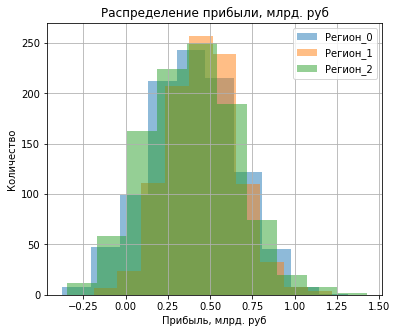

In [62]:
values_reg0.hist(figsize=(6,5), label=('Регион_0'), alpha = 0.5);
values_reg1.hist(label='Регион_1', alpha = 0.5);
values_reg2.hist(label='Регион_2', alpha = 0.5);

plt.title('Распределение прибыли, млрд. руб')
plt.xlabel('Прибыль, млрд. руб')
plt.ylabel('Количество')
plt.legend()
plt.show()

Рассчитаем риск убытков, по условию задачи вероятность наступления такого события должна быть меньше 2.5%:

In [63]:
risk_loss_0 = (values_reg0 < 0).mean()
risk_loss_0

0.065

In [64]:
risk_loss_1 = (values_reg1 < 0).mean()
risk_loss_1

0.01

In [65]:
risk_loss_2 = (values_reg2 < 0).mean()
risk_loss_2

0.064

Все регионы подходят для разработки месторождений, т.к. риск убытков менее 2.5%.

Создадим таблицу `profit_mean_pred` со средними прибылями для каждого региона, 95% доверительным интервалом и риском убытков:

In [66]:
#средние прибыли в регионах
profit_mean_pred = {'Region':('Регион_0', 'Регион_1', 'Регион_2'),
                'profit_mean':(profit_distr_mean_0, profit_distr_mean_1, profit_distr_mean_2),
                'confidence_interval_95':(confidence_interval_0, confidence_interval_1, confidence_interval_2),
                'risk_loss':(risk_loss_0, risk_loss_1, risk_loss_2)}
profit_mean_pred = pd.DataFrame(profit_mean_pred)
profit_mean_pred

,Region,profit_mean,confidence_interval_95,risk_loss
0,Регион_0,0.397094,"(-0.1077, 0.9142)",0.065
1,Регион_1,0.454775,"(0.0752, 0.8551)",0.010
2,Регион_2,0.392470,"(-0.1121, 0.9127)",0.064


### Вывод

Применим технику Bootstrap с 1000 выборок, для поиска распределение прибыли, получили следующие показатели:  

|Регион | Средние прибыли | 95% доверительный интервал| Риск убытков, %|
| --- | --- | --- | --- |
|Регион_0 |	0.397094 | (-0.1077, 0.9142)| 6.5 |
|Регион_1 |	0.454775 | (0.0752, 0.8551)	| 1 |
|Регион_2 |	0.392470 | (-0.1121, 0.9127)| 6.4 |


  
Лучшее среднее значение прибыли показал Регион_1 - **0.45**, наименьший риск убытков Регион_0 - **1 %**.  

Вероятность получить наибольшую прибыль соответствует площадке - **Регион_1**.

Остальные регионы из-за наличия выбросов в значениях запаса в скважине, показывают более низкие результаты прибыли.  

<a id="conclusion"></a>
# Вывод

Для анализа предоставленны данные для трех регионов:
- **Регион_0**,
- **Регион_1**, 
- **Регион_2**.  

Размеры таблиц с данными 100000 строк и 5 столбцов.  

Пропуски и дубликаты отсутствуют.  

Целевой признак столбец - `product`.  

Данные были разделены на обучающие и валидационные выборки для каждого региона.  

В качестве обучающей модели выбрана - **линейная регрессия**, т.к. значения целевого признака явяются непрерывной переменной. 

***Средние значения*** для предсказанных и изначальных значений практически ***не отличаются***.  

Лучшее значение **RMSE** показала модель обученная на данных **Регоина_1**.


Безубыточное количество сырья в скважине - **111 тыс. баррелей**.  

В связи с тем, что средние значения по всем скважинам в регионе ниже безубыточного количества, ***основным этапом для разработки месторождения является выбор места для бурения скважин***.  

Максимально возможные прибыли в регионах для предсказанных значений:
- Регион_0 - 3.32 млрд. руб;
- Регион_1 - 2.41 млрд. руб;
- Регион_2 - 2.71 млрд. руб.

Применив технику Bootstrap с 1000 выборок, для поиска распределение прибыли, получили следующие показатели:  

|Регион | Средние прибыли | 95% доверительный интервал| Риск убытков, %|
| --- | --- | --- | --- |
|Регион_0 |	0.397094 | (-0.1077, 0.9142)| 6.5 |
|Регион_1 |	0.454775 | (0.0752, 0.8551)	| 1 |
|Регион_2 |	0.392470 | (-0.1121, 0.9127)| 6.4 |


Исходя из анализа данных, для разработки скважин предлагаем выбрать **Регион_1** , т.к. он имеет приемлимые риски убытков и наибольшее среднее значение распределения прибыли.

**Рекмендации:**  

Требуется провести дополнительный анализ данных Региона_0 и Региона_2 для поиска аномалий в значениях признаков (*f0, f1, f2*) и улучшения качества предсказаний моделей.  
Потенциал прибыли в этих регионах велик, но требуется более точный выбор мест под бурение скважин.
